In [246]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
%matplotlib inline

plt.style.use("fivethirtyeight")
sns.set_style("white")


In [247]:
data = pd.read_csv('/content/car data.csv')

In [248]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [249]:
colors1 = ['#e6ccb2','#b08968','#7f5539'] 
colors2 = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']

In [250]:
def cat_unmariated_analysis(feature):
  data_ = data[feature].value_counts().sort_values(ascending = True)
  plt.figure(figsize = (20,5),facecolor = 'white')
  plt.subplot(1,2,1)
  plt.barh(y = data_.index,width = data_.values,
           height = 0.7,linewidth = 1,color = colors2,
           edgecolor = 'k')
  sns.despine()
  ax = plt.subplot(1,2,2)
  ax.pie(x = data_.values,labels = data_.index,
         shadow = True,radius = 1.2,
         autopct = "%1.1f%%",colors = colors2,
         explode = [0.04 for i in range(data[feature].nunique())])
  ax.add_artist(plt.Circle((0,0),0.04,facecolor = "white"))
  plt.suptitle(t = feature)
  plt.show()

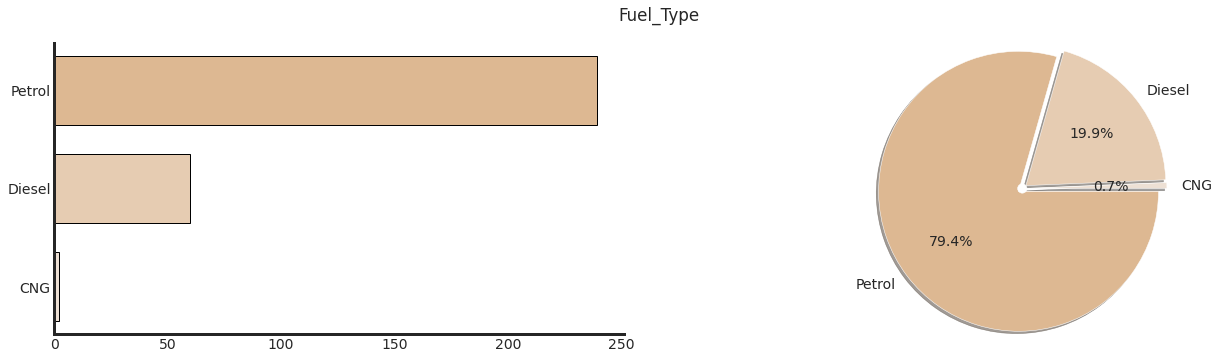

In [251]:
cat_unmariated_analysis("Fuel_Type")

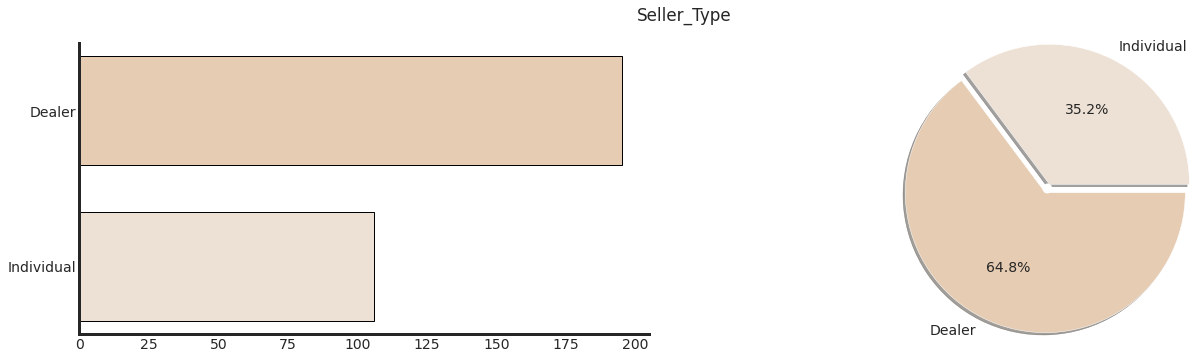

In [252]:
cat_unmariated_analysis("Seller_Type")

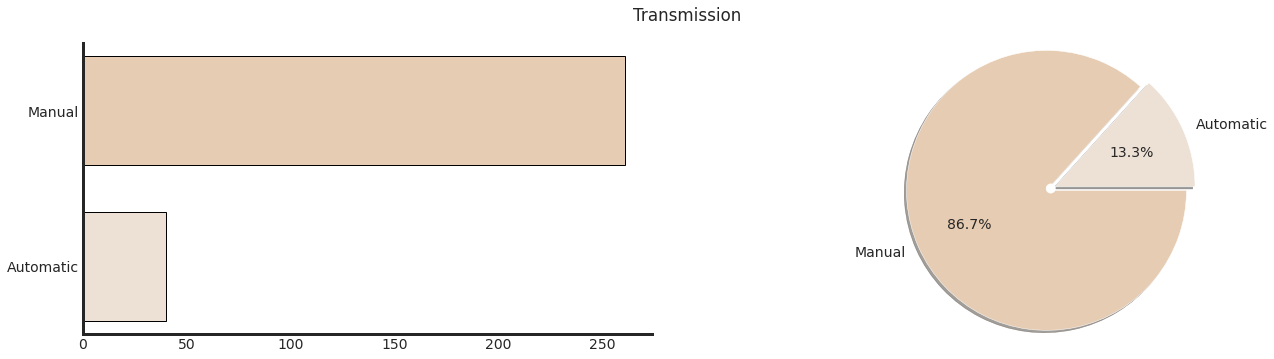

In [253]:
cat_unmariated_analysis("Transmission")

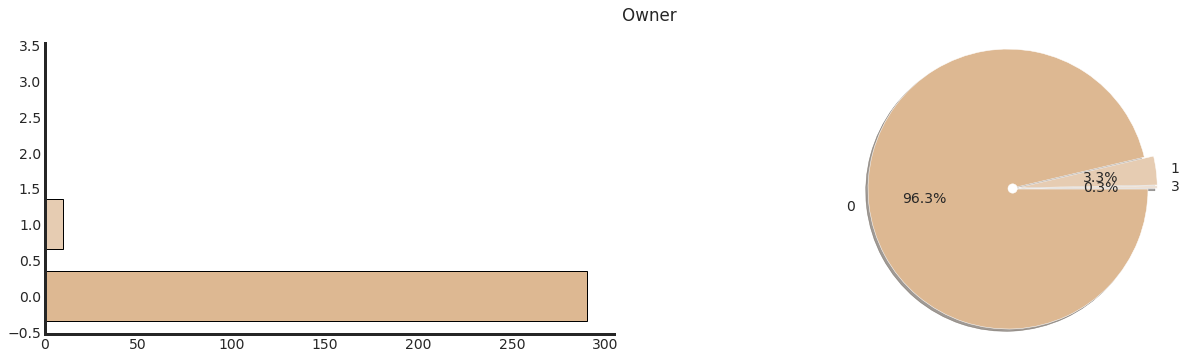

In [254]:
cat_unmariated_analysis('Owner')

In [255]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [256]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [258]:
data.shape

(301, 9)

In [259]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [260]:
data.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,"CNG":3},'Seller_Type':{'Dealer':1,"Individual":0},
              'Transmission':{"Automatic":1,"Manual":0}},inplace = True)

In [261]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,2,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,2,1,0,0


In [262]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [263]:
X = data.drop(columns = ['Car_Name','Present_Price'],axis = 1)
Y = data[['Present_Price']]

In [264]:
X

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,1,1,0,0
1,2013,4.75,43000,2,1,0,0
2,2017,7.25,6900,1,1,0,0
3,2011,2.85,5200,1,1,0,0
4,2014,4.60,42450,2,1,0,0
...,...,...,...,...,...,...,...
296,2016,9.50,33988,2,1,0,0
297,2015,4.00,60000,1,1,0,0
298,2009,3.35,87934,1,1,0,0
299,2017,11.50,9000,2,1,0,0


In [265]:
print(Y)

     Present_Price
0             5.59
1             9.54
2             9.85
3             4.15
4             6.87
..             ...
296          11.60
297           5.90
298          11.00
299          12.50
300           5.90

[301 rows x 1 columns]


In [266]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state =1)

In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
encoder = StandardScaler()

In [269]:
train_transform = encoder.fit_transform(X_train)

In [270]:
test_transform = encoder.transform(X_test)

In [271]:
model = LinearRegression()

In [272]:
model.fit(X_train,Y_train)

LinearRegression()

In [273]:
train_predict = model.predict(train_transform)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [274]:
test_predict = model.predict(test_transform)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [275]:
score1 = metrics.r2_score(Y_train,train_predict)

In [276]:
score1

-25917.519543611514

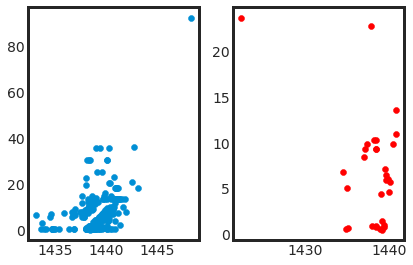

In [286]:
ax = plt.subplot(1,2,1)
plt.scatter(train_predict,Y_train)
ax = plt.subplot(1,2,2)
plt.scatter(test_predict,Y_test,color ="red")

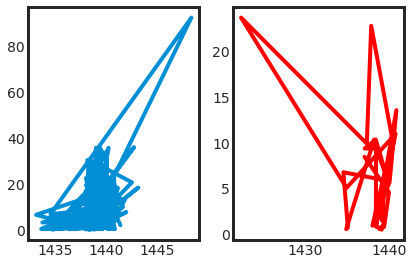

In [289]:
ax = plt.subplot(1,2,1)
plt.plot(train_predict,Y_train)
ax = plt.subplot(1,2,2)
plt.plot(test_predict,Y_test,color ="red")